### K-Nearest Neighbors (KNN) Classification

### 1. Import Libraries and Dataset¶

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap


### 2. Load Dataset :

In [21]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3.Data Preprocessing :

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Encode 'Species' column into numeric labels

In [25]:
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Species'])  # setosa=0, versicolor=1, virginica=2


### Normalize features

In [26]:
# Features (exclude Id and Species)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train model with different K values

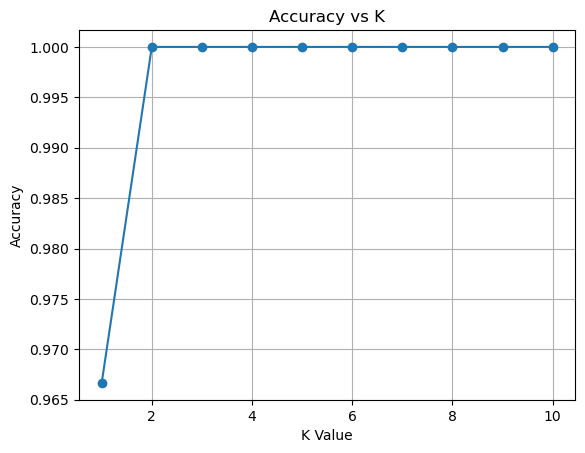

In [28]:
k_range = range(1, 11)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot
plt.plot(k_range, accuracy_scores, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

### Final model and evaluation (K=3)

Accuracy (K=3): 1.0


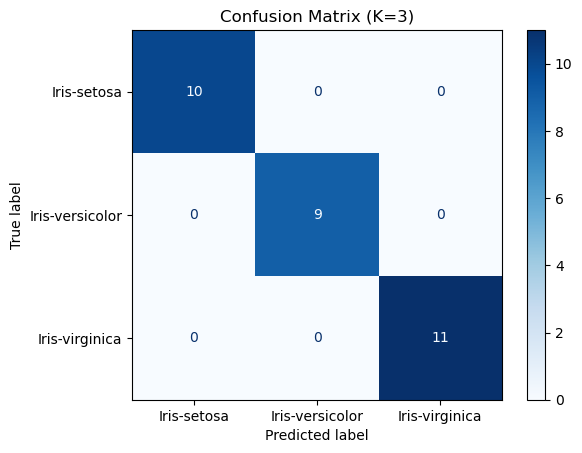

In [29]:
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print(f'Accuracy (K={best_k}):', accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()

### Visualize decision boundaries (2 features)

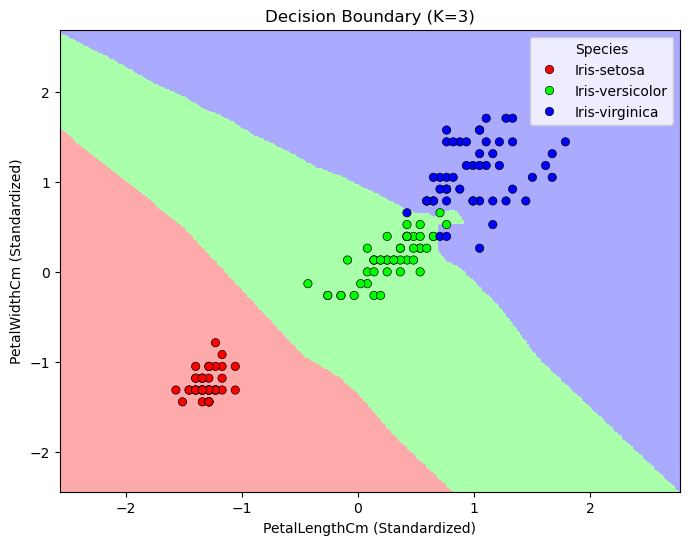

In [31]:
# Use 2 features for visualization
X_vis = df[['PetalLengthCm', 'PetalWidthCm']].values
y_vis = df['Target'].values

# Standardize
X_vis_scaled = StandardScaler().fit_transform(X_vis)

# Fit KNN
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_vis_scaled, y_vis)

# Create meshgrid
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define colormaps
colors = ['#FFAAAA', '#AAFFAA', '#AAAAFF']  # Light colors for background
border_colors = ['#FF0000', '#00FF00', '#0000FF']  # Bold colors for points

# Plot decision boundaries and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(colors))

sns.scatterplot(
    x=X_vis_scaled[:, 0],
    y=X_vis_scaled[:, 1],
    hue=le.inverse_transform(y_vis),
    palette=border_colors,
    edgecolor='k'
)

plt.xlabel('PetalLengthCm (Standardized)')
plt.ylabel('PetalWidthCm (Standardized)')
plt.title('Decision Boundary (K=3)')
plt.legend(title='Species')
plt.show()
